<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/08-1SHXXXX_football_analytics/projects/08-1SHXXXX_football_analytics/notebooks/03_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. Data Preprocessing
- Steps taken to clean or transform the data


In [1]:
!pip install mplsoccer

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86.2/86.2 kB 4.2 MB/s eta 0:00:00


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch
from mplsoccer import Sbopen
from tqdm import tqdm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Initialize parser
parser = Sbopen()

In [ ]:
matches_df = parser.match(competition_id=72, season_id=107)
match_ids = matches_df['match_id'].tolist()

all_shots = []

for match_id in match_ids:
    df_event, df_related, df_freeze, df_tactics = parser.event(match_id)

    df_shots = df_event[df_event['type_name'] == 'Shot'].copy()

    df_shots['match_id'] = match_id

    all_shots.append(df_shots)

shots_master_women_world_cup_df = pd.concat(all_shots, ignore_index=True)

In [ ]:
#Lets look at the example dataset from the Women's World Cup 2023 again. It consisted of 1680 shots. 184 of them were goals.
num_goals = shots_master_women_world_cup_df[shots_master_women_world_cup_df['outcome_name'] == 'Goal'].shape[0]
print(f"Number of goals: {num_goals}")


Number of goals: 184


In [ ]:
#As many more competitions are available the next step is to create a shots_master_df for all shots from all competitions to enrich the dataset on which to train the models later.

#During data loading and exploration these columns were discovered to always be NaN for type_name = Shot. Therefore, they are not of interest for the shots_master_df
irrelevant_columns = [
    'tactics_formation', 'pass_recipient_id', 'pass_recipient_name', 'pass_length',
    'pass_angle', 'pass_height_id', 'pass_height_name', 'counterpress', 'pass_switch',
    'block_deflection', 'pass_cross', 'pass_assisted_shot_id', 'pass_shot_assist',
    'goalkeeper_position_id', 'goalkeeper_position_name', 'foul_committed_card_id',
    'foul_committed_card_name', 'ball_recovery_recovery_failure', 'foul_committed_advantage',
    'foul_won_advantage', 'foul_won_defensive', 'dribble_nutmeg', 'pass_goal_assist',
    'substitution_replacement_id', 'substitution_replacement_name', 'bad_behaviour_card_id',
    'bad_behaviour_card_name', 'pass_cut_back', 'dribble_overrun', 'ball_recovery_offensive',
    'pass_no_touch', 'pass_deflected', 'foul_committed_penalty', 'foul_won_penalty',
    'injury_stoppage_in_chain', 'foul_committed_offensive', 'block_offensive',
    'pass_miscommunication', 'block_save_block', 'dribble_no_touch', 'player_off_permanent'
]

all_shots = []

df_competitions = parser.competition()

# Add mininterval or miniters to slow down tqdm output
for _, row in tqdm(df_competitions.iterrows(), total=len(df_competitions), desc="Competitions", mininterval=2.0):
    comp_id = row['competition_id']
    season_id = row['season_id']
    comp_name = row['competition_name']
    season_name = row['season_name']

    tqdm.write(f"\nüîÑ Processing {comp_name} - {season_name}...")

    try:
        matches_df = parser.match(competition_id=comp_id, season_id=season_id)
        match_ids = matches_df['match_id'].tolist()

        for match_id in tqdm(
            match_ids,
            desc=f"  Matches in {comp_name[:15]} {season_name}",
            leave=False,
            mininterval=20,
        ):
            try:
                df_event, df_related, df_freeze, df_tactics = parser.event(match_id)
                df_shots = df_event[df_event['type_name'] == 'Shot'].copy()
                df_shots['match_id'] = match_id
                all_shots.append(df_shots)
            except Exception as e:
                print(f"     ‚ùå Error in match_id {match_id}: {e}")

    except Exception as e:
        print(f"‚ùå Could not fetch matches for {comp_name} - {season_name}: {e}")

shots_master_df = pd.concat(all_shots, ignore_index=True)
shots_master_df = shots_master_df.drop(columns=[col for col in irrelevant_columns if col in shots_master_df.columns])

print("\n‚úÖ All done!")
print("üìä Final shape of shots_master_df:", shots_master_df.shape)


Competitions:   0%|          | 0/74 [00:00<?, ?it/s]


üîÑ Processing 1. Bundesliga - 2023/2024...



Competitions:   1%|‚ñè         | 1/74 [00:22<26:59, 22.19s/it]


üîÑ Processing 1. Bundesliga - 2015/2016...



Competitions:   3%|‚ñé         | 2/74 [03:36<2:27:54, 123.26s/it]


üîÑ Processing African Cup of Nations - 2023...



Competitions:   4%|‚ñç         | 3/74 [04:13<1:39:14, 83.86s/it]


üîÑ Processing Champions League - 2018/2019...



Competitions:   4%|‚ñç         | 3/74 [04:14<1:39:14, 83.86s/it]


üîÑ Processing Champions League - 2017/2018...



Competitions:   7%|‚ñã         | 5/74 [04:15<42:33, 37.00s/it]


üîÑ Processing Champions League - 2016/2017...



Competitions:   7%|‚ñã         | 5/74 [04:16<42:33, 37.00s/it]


üîÑ Processing Champions League - 2015/2016...



Competitions:   7%|‚ñã         | 5/74 [04:17<42:33, 37.00s/it]


üîÑ Processing Champions League - 2014/2015...



Competitions:  11%|‚ñà         | 8/74 [04:18<18:56, 17.21s/it]


üîÑ Processing Champions League - 2013/2014...



Competitions:  11%|‚ñà         | 8/74 [04:18<18:56, 17.21s/it]


üîÑ Processing Champions League - 2012/2013...



Competitions:  11%|‚ñà         | 8/74 [04:19<18:56, 17.21s/it]


üîÑ Processing Champions League - 2011/2012...



Competitions:  15%|‚ñà‚ñç        | 11/74 [04:20<10:31, 10.03s/it]


üîÑ Processing Champions League - 2010/2011...



Competitions:  15%|‚ñà‚ñç        | 11/74 [04:21<10:31, 10.03s/it]


üîÑ Processing Champions League - 2009/2010...



Competitions:  15%|‚ñà‚ñç        | 11/74 [04:22<10:31, 10.03s/it]


üîÑ Processing Champions League - 2008/2009...



Competitions:  19%|‚ñà‚ñâ        | 14/74 [04:23<06:30,  6.50s/it]


üîÑ Processing Champions League - 2006/2007...



Competitions:  19%|‚ñà‚ñâ        | 14/74 [04:24<06:30,  6.50s/it]


üîÑ Processing Champions League - 2004/2005...



Competitions:  19%|‚ñà‚ñâ        | 14/74 [04:25<06:30,  6.50s/it]


üîÑ Processing Champions League - 2003/2004...



Competitions:  23%|‚ñà‚ñà‚ñé       | 17/74 [04:26<04:18,  4.54s/it]


üîÑ Processing Champions League - 1999/2000...



Competitions:  23%|‚ñà‚ñà‚ñé       | 17/74 [04:27<04:18,  4.54s/it]


üîÑ Processing Champions League - 1972/1973...



Competitions:  23%|‚ñà‚ñà‚ñé       | 17/74 [04:28<04:18,  4.54s/it]


üîÑ Processing Champions League - 1971/1972...



Competitions:  27%|‚ñà‚ñà‚ñã       | 20/74 [04:29<02:59,  3.33s/it]


üîÑ Processing Champions League - 1970/1971...



Competitions:  27%|‚ñà‚ñà‚ñã       | 20/74 [04:29<02:59,  3.33s/it]


üîÑ Processing Copa America - 2024...



Competitions:  30%|‚ñà‚ñà‚ñâ       | 22/74 [04:52<04:38,  5.35s/it]


üîÑ Processing Copa del Rey - 1983/1984...



Competitions:  30%|‚ñà‚ñà‚ñâ       | 22/74 [04:53<04:38,  5.35s/it]


üîÑ Processing Copa del Rey - 1982/1983...



Competitions:  30%|‚ñà‚ñà‚ñâ       | 22/74 [04:54<04:38,  5.35s/it]


üîÑ Processing Copa del Rey - 1977/1978...



Competitions:  34%|‚ñà‚ñà‚ñà‚ñç      | 25/74 [04:54<03:06,  3.81s/it]


üîÑ Processing FA Women's Super League - 2020/2021...



Competitions:  35%|‚ñà‚ñà‚ñà‚ñå      | 26/74 [06:29<13:10, 16.47s/it]


üîÑ Processing FA Women's Super League - 2019/2020...



Competitions:  36%|‚ñà‚ñà‚ñà‚ñã      | 27/74 [07:34<19:14, 24.57s/it]


üîÑ Processing FA Women's Super League - 2018/2019...



Competitions:  38%|‚ñà‚ñà‚ñà‚ñä      | 28/74 [08:51<26:38, 34.74s/it]


üîÑ Processing FIFA U20 World Cup - 1979...



Competitions:  38%|‚ñà‚ñà‚ñà‚ñä      | 28/74 [08:52<26:38, 34.74s/it]


üîÑ Processing FIFA World Cup - 2022...



Competitions:  41%|‚ñà‚ñà‚ñà‚ñà      | 30/74 [09:41<22:53, 31.22s/it]


üîÑ Processing FIFA World Cup - 2018...



Competitions:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 31/74 [10:28<24:41, 34.46s/it]


üîÑ Processing FIFA World Cup - 1990...



Competitions:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 31/74 [10:29<24:41, 34.46s/it]


üîÑ Processing FIFA World Cup - 1986...



Competitions:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 33/74 [10:31<15:20, 22.45s/it]


üîÑ Processing FIFA World Cup - 1974...



Competitions:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 33/74 [10:36<15:20, 22.45s/it]


üîÑ Processing FIFA World Cup - 1970...



Competitions:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 35/74 [10:40<10:33, 16.25s/it]


üîÑ Processing FIFA World Cup - 1962...



Competitions:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 35/74 [10:41<10:33, 16.25s/it]


üîÑ Processing FIFA World Cup - 1958...



Competitions:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 37/74 [10:43<07:01, 11.40s/it]


üîÑ Processing Indian Super league - 2021/2022...



Competitions:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 38/74 [12:04<14:47, 24.65s/it]


üîÑ Processing La Liga - 2020/2021...



Competitions:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 39/74 [12:33<14:55, 25.59s/it]


üîÑ Processing La Liga - 2019/2020...



Competitions:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 40/74 [13:00<14:40, 25.91s/it]


üîÑ Processing La Liga - 2018/2019...



Competitions:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 41/74 [13:27<14:26, 26.26s/it]


üîÑ Processing La Liga - 2017/2018...



Competitions:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 42/74 [13:56<14:16, 26.78s/it]


üîÑ Processing La Liga - 2016/2017...



Competitions:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 43/74 [14:21<13:40, 26.48s/it]


üîÑ Processing La Liga - 2015/2016...



Competitions:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 44/74 [19:03<49:03, 98.11s/it]


üîÑ Processing La Liga - 2014/2015...



Competitions:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 45/74 [19:33<37:59, 78.61s/it]


üîÑ Processing La Liga - 2013/2014...



Competitions:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 46/74 [19:58<29:26, 63.10s/it]


üîÑ Processing La Liga - 2012/2013...



Competitions:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 47/74 [20:24<23:33, 52.34s/it]


üîÑ Processing La Liga - 2011/2012...



Competitions:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 48/74 [20:55<19:53, 45.89s/it]


üîÑ Processing La Liga - 2010/2011...



Competitions:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 49/74 [21:21<16:44, 40.17s/it]


üîÑ Processing La Liga - 2009/2010...



Competitions:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 50/74 [21:47<14:23, 35.98s/it]


üîÑ Processing La Liga - 2008/2009...



Competitions:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 51/74 [22:11<12:22, 32.28s/it]


üîÑ Processing La Liga - 2007/2008...



Competitions:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 52/74 [22:32<10:34, 28.85s/it]


üîÑ Processing La Liga - 2006/2007...



Competitions:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 53/74 [22:52<09:08, 26.12s/it]


üîÑ Processing La Liga - 2005/2006...



Competitions:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 54/74 [23:04<07:21, 22.06s/it]


üîÑ Processing La Liga - 2004/2005...



Competitions:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 55/74 [23:09<05:23, 17.01s/it]


üîÑ Processing La Liga - 1973/1974...



Competitions:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 55/74 [23:10<05:23, 17.01s/it]


üîÑ Processing Liga Profesional - 1997/1998...



Competitions:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 55/74 [23:11<05:23, 17.01s/it]


üîÑ Processing Liga Profesional - 1981...



Competitions:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 58/74 [23:12<02:07,  7.94s/it]


üîÑ Processing Ligue 1 - 2022/2023...



Competitions:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 59/74 [23:39<02:59, 11.99s/it]


üîÑ Processing Ligue 1 - 2021/2022...



Competitions:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 60/74 [24:01<03:20, 14.32s/it]


üîÑ Processing Ligue 1 - 2015/2016...



Competitions:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 61/74 [28:54<18:07, 83.68s/it]


üîÑ Processing Major League Soccer - 2023...



Competitions:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 62/74 [28:59<12:36, 63.05s/it]


üîÑ Processing North American League - 1977...



Competitions:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 62/74 [29:00<12:36, 63.05s/it]


üîÑ Processing NWSL - 2018...



Competitions:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 64/74 [29:25<06:56, 41.63s/it]


üîÑ Processing Premier League - 2015/2016...



Competitions:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 65/74 [34:07<14:41, 97.96s/it]


üîÑ Processing Premier League - 2003/2004...



Competitions:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 66/74 [34:35<10:41, 80.23s/it]


üîÑ Processing Serie A - 2015/2016...



Competitions:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 67/74 [39:35<16:07, 138.18s/it]


üîÑ Processing Serie A - 1986/1987...



Competitions:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 67/74 [39:36<16:07, 138.18s/it]


üîÑ Processing UEFA Euro - 2024...



Competitions:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 69/74 [40:15<07:16, 87.36s/it]


üîÑ Processing UEFA Euro - 2020...



Competitions:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 70/74 [40:54<05:04, 76.04s/it]


üîÑ Processing UEFA Europa League - 1988/1989...



Competitions:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 71/74 [40:56<02:52, 57.51s/it]


üîÑ Processing UEFA Women's Euro - 2022...



Competitions:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 72/74 [41:19<01:36, 48.36s/it]


üîÑ Processing Women's World Cup - 2023...



Competitions:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 73/74 [41:58<00:45, 45.85s/it]


üîÑ Processing Women's World Cup - 2019...



Competitions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 74/74 [42:36<00:00, 34.55s/it]



‚úÖ All done!
üìä Final shape of shots_master_df: (87111, 49)


In [ ]:
#Since creating the dataset took more than 40 minutes I want to permanently safe it to a .csv, that I can always access. Before saving I reorder the columns.

ordered_columns = [
    #identifiers
    'id',
    'index',
    'match_id',

    #time information
    'period',
    'timestamp',

    #team and player columns
    'team_id',
    'team_name',
    'player_id',
    'player_name',
    'position_id',
    'position_name',

    #location columns
    'x',
    'y',
    'end_x',
    'end_y',
    'end_z',

    #shot details
    'body_part_id',
    'body_part_name',
    'sub_type_id',
    'sub_type_name',
    'technique_id',
    'technique_name',
    'shot_statsbomb_xg',
    'shot_key_pass_id',
    'under_pressure',
    'off_camera',
    'out',
    'aerial_won',

    #special attributes
    'shot_first_time',
    'shot_one_on_one',
    'shot_deflected',
    'shot_open_goal',
    'shot_redirect',
    'shot_follows_dribble',

    #outcome
    'outcome_id',
    'outcome_name',

    #rare or redundant
    'minute',
    'second',
    'duration',
    'half_start_late_video_start',
    'half_end_early_video_end',
    'pass_backheel',
    'possession',
    'possession_team_id',
    'possession_team_name',
    'play_pattern_id',
    'play_pattern_name'
]

shots_master_df = shots_master_df[[col for col in ordered_columns if col in shots_master_df.columns]]

In [ ]:
shots_master_df.to_csv("shots_master_df.csv", index=False)

In [ ]:
print(shots_master_df.shape)
shots_master_df.head()

(87111, 47)


id  index  match_id  period  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b    436   3895302       1   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55    480   3895302       1   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f    597   3895302       1   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e    684   3895302       1   
4  bb53b537-1685-4019-9e8f-98f3805828eb    848   3895302       1   

         timestamp  team_id         team_name  player_id  \
0  00:06:48.773000      176     Werder Bremen     8826.0   
1  00:07:40.953000      904  Bayer Leverkusen    38004.0   
2  00:11:08.471000      176     Werder Bremen    51769.0   
3  00:13:16.073000      904  Bayer Leverkusen     8221.0   
4  00:16:00.956000      904  Bayer Leverkusen     3500.0   

                   player_name  position_id  ... second  duration  \
0         Leonardo Bittencourt         13.0  ...     48  0.052872   
1  Piero Mart√≠n Hincapi√© Reyna          8.0  ...     40  0.217872   
2              Juli√°n Malatini          3.0  ...      8  0.445768   
3                 Jonathan Tah          4.0  ...     16  0.085298   
4                 Granit Xhaka          9.0  ...      0  0.402989   

   half_start_late_video_start  half_end_early_video_end  pass_backheel  \
0                          NaN                       NaN            NaN   
1                          NaN                       NaN            NaN   
2                          NaN                       NaN            NaN   
3                          NaN                       NaN            NaN   
4                          NaN                       NaN            NaN   

   possession  possession_team_id possession_team_name  play_pattern_id  \
0          13                 176        Werder Bremen                3   
1          14                 904     Bayer Leverkusen                1   
2          22                 176        Werder Bremen                3   
3          26                 904     Bayer Leverkusen                2   
4          33                 904     Bayer Leverkusen                1   

  play_pattern_name  
0    From Free Kick  
1      Regular Play  
2    From Free Kick  
3       From Corner  
4      Regular Play  

[5 rows x 47 columns]

In [6]:
#As the shots_master_df has now been stored to a csv and was uploaded to Google Drive we can access it from there

file_id = '1DNvQtuRq3f-xYvh4McKdJo5j3hMZI2DB'
url = f'https://drive.google.com/uc?id={file_id}'

shots_master_df = pd.read_csv(url)

print(shots_master_df.shape)
shots_master_df.head()

(87111, 47)


id  index  match_id  period  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b    436   3895302       1   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55    480   3895302       1   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f    597   3895302       1   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e    684   3895302       1   
4  bb53b537-1685-4019-9e8f-98f3805828eb    848   3895302       1   

         timestamp  team_id         team_name  player_id  \
0  00:06:48.773000      176     Werder Bremen     8826.0   
1  00:07:40.953000      904  Bayer Leverkusen    38004.0   
2  00:11:08.471000      176     Werder Bremen    51769.0   
3  00:13:16.073000      904  Bayer Leverkusen     8221.0   
4  00:16:00.956000      904  Bayer Leverkusen     3500.0   

                   player_name  position_id  ... second  duration  \
0         Leonardo Bittencourt         13.0  ...     48  0.052872   
1  Piero Mart√≠n Hincapi√© Reyna          8.0  ...     40  0.217872   
2              Juli√°n Malatini          3.0  ...      8  0.445768   
3                 Jonathan Tah          4.0  ...     16  0.085298   
4                 Granit Xhaka          9.0  ...      0  0.402989   

   half_start_late_video_start  half_end_early_video_end  pass_backheel  \
0                          NaN                       NaN            NaN   
1                          NaN                       NaN            NaN   
2                          NaN                       NaN            NaN   
3                          NaN                       NaN            NaN   
4                          NaN                       NaN            NaN   

   possession  possession_team_id possession_team_name  play_pattern_id  \
0          13                 176        Werder Bremen                3   
1          14                 904     Bayer Leverkusen                1   
2          22                 176        Werder Bremen                3   
3          26                 904     Bayer Leverkusen                2   
4          33                 904     Bayer Leverkusen                1   

  play_pattern_name  
0    From Free Kick  
1      Regular Play  
2    From Free Kick  
3       From Corner  
4      Regular Play  

[5 rows x 47 columns]

In [7]:
shots_master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87111 entries, 0 to 87110
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           87111 non-null  object 
 1   index                        87111 non-null  int64  
 2   match_id                     87111 non-null  int64  
 3   period                       87111 non-null  int64  
 4   timestamp                    87111 non-null  object 
 5   team_id                      87111 non-null  int64  
 6   team_name                    87111 non-null  object 
 7   player_id                    87111 non-null  float64
 8   player_name                  87111 non-null  object 
 9   position_id                  87111 non-null  float64
 10  position_name                87111 non-null  object 
 11  x                            87111 non-null  float64
 12  y                            87111 non-null  float64
 13  end_x           

In [8]:
#Shots_master_df has 87111 rows and 9667 rows.
num_goals_master = shots_master_df[shots_master_df['outcome_name'] == 'Goal'].shape[0]
print(f"Number of goals in shots_master_df: {num_goals_master}")

Number of goals in shots_master_df: 9667


In [9]:
#The dataframe already has columns, that could be potential features for the models. Others have to be constructed. That will happen next, starting with the distance to Goal.
#For that it is important to understand the statsbomb coordinate system.

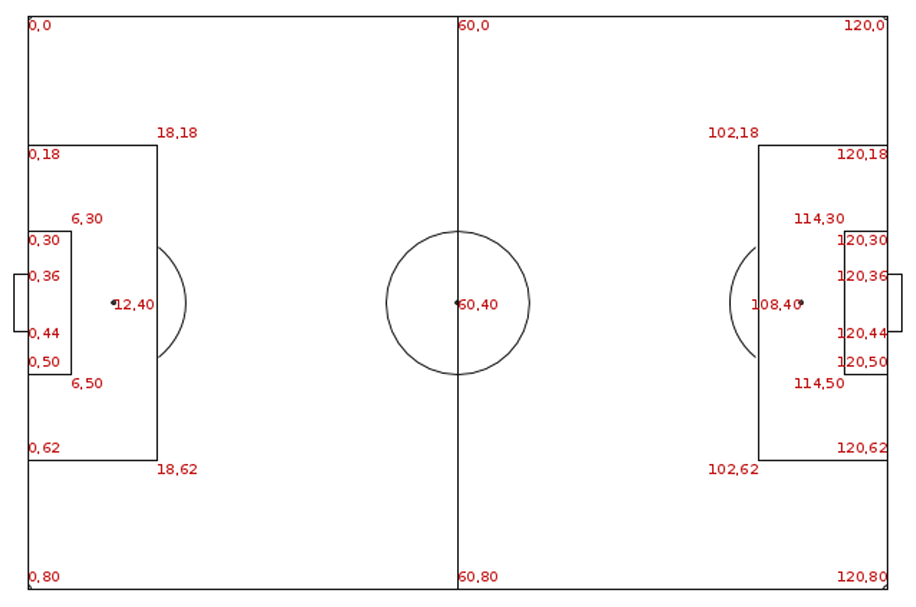

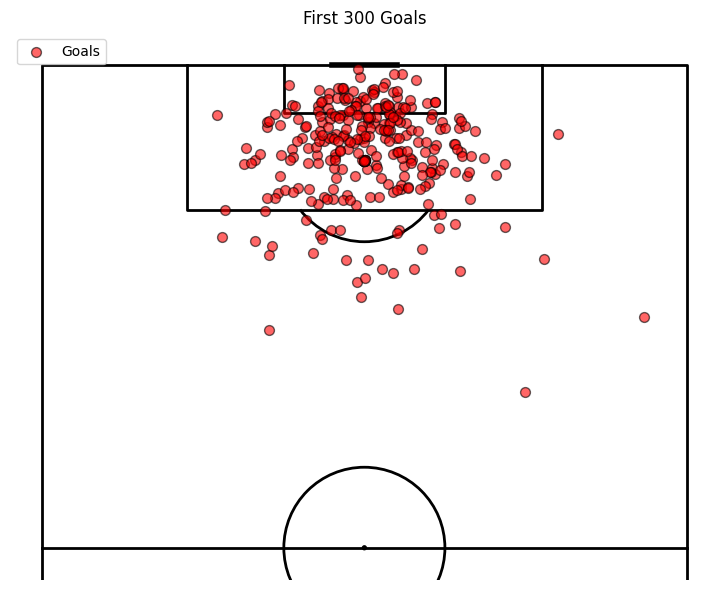

In [10]:
#All shots are mapped onto one goal in the Statsbomb data, allowing visualization using just half the pitch.

first_300_goals = shots_master_df[shots_master_df['outcome_name'] == 'Goal'].iloc[:300]

pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half = True)
fig, ax = pitch.draw(figsize=(10, 6))

pitch.scatter(first_300_goals['x'], first_300_goals['y'], ax=ax, color='red', edgecolors='black',alpha = 0.6, s=50, label='Goals')

plt.title('First 300 Goals')
plt.legend(loc = 'upper left')
plt.show()

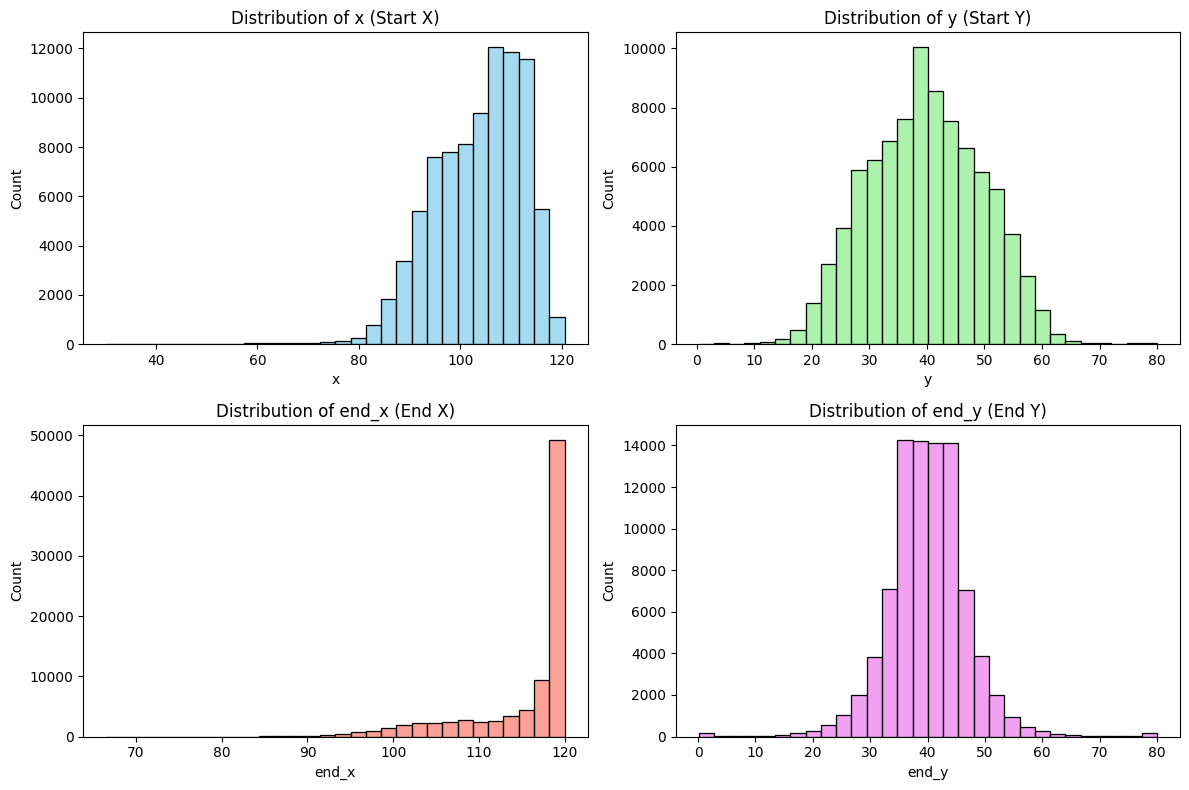

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(shots_master_df['x'], bins=30, kde=False, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of x (Start X)')

sns.histplot(shots_master_df['y'], bins=30, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Distribution of y (Start Y)')

sns.histplot(shots_master_df['end_x'], bins=30, kde=False, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Distribution of end_x (End X)')

sns.histplot(shots_master_df['end_y'], bins=30, kde=False, ax=axs[1, 1], color='violet')
axs[1, 1].set_title('Distribution of end_y (End Y)')

plt.tight_layout()
plt.show()


In [12]:
#We can see that the shots are directed towards the goal with the center located at x = 120, y = 40. Strong outliers are considered very bad attempts.
#IMPORTANT: Statbomb uses the coordinates to standardize their measurements across pitches of different sizes. This is useful for modeling and plotting, especially for visual consistency across competitions and leagues.
#Therefore, the distance to goal is not calculated in meters but in pitch units. It can be calculated using Eukledian Distance.

GOAL_CENTER_X = 120
GOAL_CENTER_Y = 40

shots_master_df['distance_to_goal'] = np.sqrt(
    (GOAL_CENTER_X - shots_master_df['x'])**2 +
    (GOAL_CENTER_Y - shots_master_df['y'])**2
)

shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'distance_to_goal', 'match_id', 'outcome_name']].head()

id  period        timestamp  team_id  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b       1  00:06:48.773000      176   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55       1  00:07:40.953000      904   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f       1  00:11:08.471000      176   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e       1  00:13:16.073000      904   
4  bb53b537-1685-4019-9e8f-98f3805828eb       1  00:16:00.956000      904   

          team_name  player_id                  player_name      x     y  \
0     Werder Bremen     8826.0         Leonardo Bittencourt  100.4  35.1   
1  Bayer Leverkusen    38004.0  Piero Mart√≠n Hincapi√© Reyna  114.6  33.5   
2     Werder Bremen    51769.0              Juli√°n Malatini  106.2  55.8   
3  Bayer Leverkusen     8221.0                 Jonathan Tah  113.9  47.4   
4  Bayer Leverkusen     3500.0                 Granit Xhaka   89.2  42.5   

   distance_to_goal  match_id outcome_name  
0         20.203218   3895302      Blocked  
1          8.450444   3895302        Saved  
2         20.978084   3895302      Blocked  
3          9.590099   3895302      Blocked  
4         30.901294   3895302      Blocked

In [13]:
#TO DO: Plot distance to goal scatter plot

In [14]:
#Now I want to visualy show an example how distance to goal works. Let's look at a random match of Spain's women in the 2023 World Cup
parser = Sbopen()
matches_df = parser.match(competition_id=72, season_id=107)
matches_df = matches_df[(matches_df["home_team_name"] == "Spain Women's")|(matches_df["away_team_name"] == "Spain Women's")]
print(matches_df['match_id'].unique())

dis_to_goal_df = shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'distance_to_goal', 'match_id', 'outcome_name']]

goals_df = dis_to_goal_df[
    (dis_to_goal_df['match_id'] == 3902240) &
    (dis_to_goal_df['outcome_name'] == 'Goal')
]

goals_df.head()

[3906390 3904628 3893806 3893822 3902240 3901733 3893791]


id  period        timestamp  team_id  \
84554  7c9b6e01-2124-4135-9fb7-81350a3b474e       2  00:35:16.785000      863   
84560  723925a1-dbde-4898-a8be-bbabe9588e56       2  00:45:50.961000      851   
84571  4e9448ed-25c8-4538-a023-8829ec229c42       4  00:05:36.645000      863   

                 team_name  player_id                       player_name  \
84554        Spain Women's    10161.0  Mar√≠a Francesca Caldentey Oliver   
84560  Netherlands Women's    10647.0           Stephanie van der Gragt   
84571        Spain Women's   222682.0         Salma Paralluelo Ayingono   

           x     y  distance_to_goal  match_id outcome_name  
84554  108.1  40.1         11.900420   3902240         Goal  
84560  102.8  50.4         20.099751   3902240         Goal  
84571  106.4  30.3         16.704790   3902240         Goal

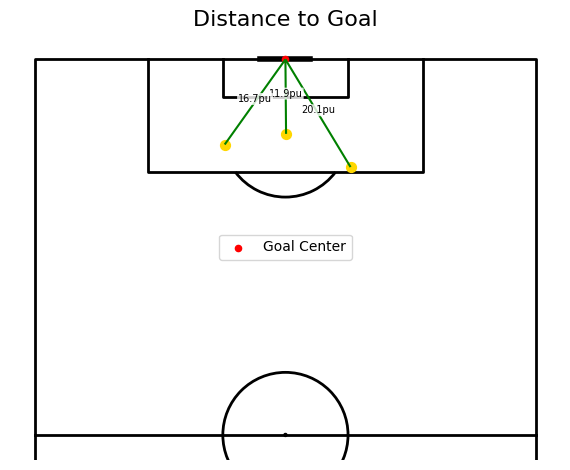

In [15]:
GOAL_CENTER_X = 120
GOAL_CENTER_Y = 40


pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half = True)
fig, ax = pitch.draw(
    #figsize=(6, 10)
)

pitch.scatter(GOAL_CENTER_X, GOAL_CENTER_Y, s=20, c='red', ax=ax, label='Goal Center')

for _, row in goals_df.iterrows():
    shot_x = row['x']
    shot_y = row['y']
    distance = row['distance_to_goal']

    pitch.scatter(shot_x, shot_y, ax=ax, c='gold', s=50)

    pitch.lines(shot_x, shot_y, GOAL_CENTER_X, GOAL_CENTER_Y, ax=ax, color='green', lw=1.5)

    mid_x = (shot_x + GOAL_CENTER_X) / 2
    mid_y = (shot_y + GOAL_CENTER_Y) / 2
    pitch.annotate(
      f"{distance:.1f}pu",
      xy=(mid_x, mid_y),
      ax=ax,
      fontsize=7,
      ha='center',
      color='black',
      bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round', pad=0.1)
    )

ax.set_title('Distance to Goal', fontsize=16)
ax.legend()
plt.show()

#One goal was a penalty. Because the coordinate system penalty spot is at 108,40 and the center of the goal is at 120,40 distance_to_goal is 12.

In [16]:
#The next feature to consider is the angle to the goal. For that the goalposts need to be considered.

#Goalposts y-coordinates
goal_y1 = 36  #left post
goal_y2 = 44  #right post
GOAL_WIDTH = 8

#Shot coordinates
x = shots_master_df['x'].to_numpy()
y = shots_master_df['y'].to_numpy()

#Distances from shot to left and right goalposts
a = np.sqrt((GOAL_CENTER_X - x)**2 + (goal_y1 - y)**2)
b = np.sqrt((GOAL_CENTER_X - x)**2 + (goal_y2 - y)**2)
c = GOAL_WIDTH

#Avoid division by zero
denominator = 2 * a * b
cos_angle = (a**2 + b**2 - c**2) / denominator
cos_angle = np.clip(cos_angle, -1.0, 1.0)  # Ensure within valid arccos range

#Calculate angle in radians
angle_radians = np.arccos(cos_angle)

shots_master_df['angle_to_goal'] = angle_radians
shots_master_df['angle_to_goal_deg'] = np.degrees(angle_radians)

In [23]:
angle_to_goal_df = shots_master_df[['id' ,'period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'angle_to_goal','angle_to_goal_deg', 'match_id', 'outcome_name']]

goal_angles_df = angle_to_goal_df[
    (angle_to_goal_df['match_id'] == 3902240) &
    (angle_to_goal_df['outcome_name'] == 'Goal')
]

goal_angles_df.head()

id  period        timestamp  team_id  \
84554  7c9b6e01-2124-4135-9fb7-81350a3b474e       2  00:35:16.785000      863   
84560  723925a1-dbde-4898-a8be-bbabe9588e56       2  00:45:50.961000      851   
84571  4e9448ed-25c8-4538-a023-8829ec229c42       4  00:05:36.645000      863   

                 team_name  player_id                       player_name  \
84554        Spain Women's    10161.0  Mar√≠a Francesca Caldentey Oliver   
84560  Netherlands Women's    10647.0           Stephanie van der Gragt   
84571        Spain Women's   222682.0         Salma Paralluelo Ayingono   

           x     y  angle_to_goal  angle_to_goal_deg  match_id outcome_name  
84554  108.1  40.1       0.648501          37.156345   3902240         Goal  
84560  102.8  50.4       0.340802          19.526500   3902240         Goal  
84571  106.4  30.3       0.392183          22.470456   3902240         Goal

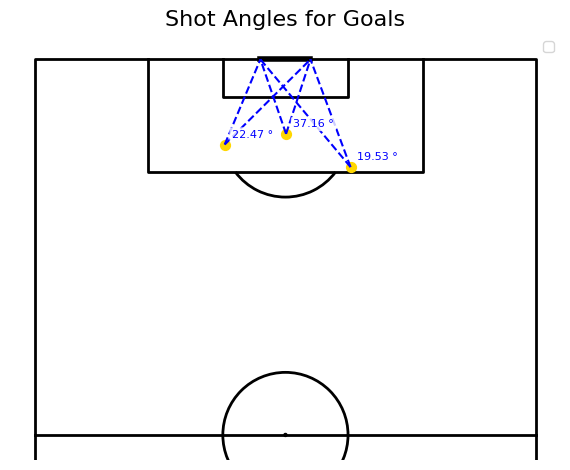

In [18]:
goal_x, goal_y = 120, 40
left_post_y = 36
right_post_y = 44
goal_width = 8

pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half=True)
fig, ax = pitch.draw()

for i, row in goal_angles_df.iterrows():
    shot_x = row['x']
    shot_y = row['y']
    angle = row['angle_to_goal_deg']

    pitch.scatter(shot_x, shot_y, ax=ax, c='gold', s=50, label='Goal' if i == 0 else None)

    pitch.lines(shot_x, shot_y, goal_x, left_post_y, ax=ax, color='blue', lw=1.5, linestyle='--')
    pitch.lines(shot_x, shot_y, goal_x, right_post_y, ax=ax, color='blue', lw=1.5, linestyle='--')

    pitch.annotate(
        f"{angle:.2f} ¬∞",
        xy=(shot_x, shot_y),
        ax=ax,
        fontsize=8,
        ha='left',
        color='blue',
        xytext=(5, 5),
        textcoords='offset points',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round' ,pad=0.2)
    )

ax.set_title('Shot Angles for Goals', fontsize=16)
ax.legend()
plt.show()

#For the penalty, if placed perfectly at 108, 40 the angle would be ~36.9¬∞.
#However, this specific penalty is placed at 108.1, 40.1 which equals an angle of 37.2¬∞

In [35]:
#Another feature that is intuetively relevent would be how many players are between the goal and the shoot position.
#My first idea is to reuse the triangle used to calculated the angle for this and identify all players within the triangle as "in the way".
#I want to distinct between teammates and opponents as the teammates will try to avoid blocking the shoot and the opponents obviously wont.

df_event, df_related, df_freeze, df_tactics = parser.event(3902240)
first_goal_freeze_df = df_freeze[df_freeze["id"] == '723925a1-dbde-4898-a8be-bbabe9588e56']
first_goal_freeze_df.head(22)

teammate  match_id                                    id      x     y  \
253     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56  101.3  50.2   
254     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56  100.5  42.2   
255      True   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   89.6  47.4   
256     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   94.3  55.8   
257     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   83.3  69.3   
258     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   82.7  57.7   
259     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56  114.9  44.0   
260      True   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   98.1  40.1   
261      True   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   88.1  56.3   

     player_id                 player_name  position_id  \
253      10165     Irene Paredes Hernandez            3   
254      49889    Oihane Hern√°ndez Zurbano            2   
255      10654              Jackie Groenen           11   
256      49831           Ivana Andr√©s Sanz            5   
257      46639          Ona Batlle Pascual            6   
258      49835     Teresa Abelleira Due√±as           10   
259      45295  Catalina Thomas Coll Lluch            1   
260      10656          Lineth Beerensteyn           21   
261      46459               Katja Snoeijs           17   

                 position_name  event_freeze_id  
253          Right Center Back                1  
254                 Right Back                2  
255    Left Defensive Midfield                3  
256           Left Center Back                4  
257                  Left Back                5  
258  Center Defensive Midfield                6  
259                 Goalkeeper                7  
260                  Left Wing                8  
261                 Right Wing                9

In [39]:
all_freeze_frames = []

shots_grouped = shots_master_df.groupby('match_id')

for match_id, shots_in_match in tqdm(shots_grouped, total=len(shots_grouped), desc="Getting freeze frames"):

    try:
        _, _, df_freeze, _ = parser.event(match_id)

        if df_freeze is None or df_freeze.empty:
            continue

        shot_ids = shots_in_match['id'].unique()
        df_filtered_freeze = df_freeze[df_freeze['id'].isin(shot_ids)].copy()

        if df_filtered_freeze.empty:
            continue

        df_filtered_freeze['match_id'] = match_id

        all_freeze_frames.append(df_filtered_freeze)

    except Exception as e:
        print(f"‚ùå Error fetching freeze frames for match {match_id}: {e}")

if all_freeze_frames:
    freeze_master_df = pd.concat(all_freeze_frames, ignore_index=True)
    print("‚úÖ Freeze frame data collected:", freeze_master_df.shape)
else:
    print("‚ö†Ô∏è No freeze frame data was collected.")


Getting freeze frames: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3433/3433 [39:36<00:00,  1.44it/s]


‚úÖ Freeze frame data collected: (1110839, 10)


In [41]:
freeze_master_df.to_csv("freeze_master_df.csv", index=False)

In [42]:
left_post = np.array([120, 36])
right_post = np.array([120, 44])

def point_in_triangle(pt, v1, v2, v3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0

    return ((b1 == b2) and (b2 == b3))

In [44]:
from tqdm import tqdm

freeze_grouped = freeze_master_df.groupby(['match_id', 'id'])

shots_master_df['opponents_in_way'] = 0
shots_master_df['teammates_in_way'] = 0

for idx, shot in tqdm(shots_master_df.iterrows(), total=len(shots_master_df), desc="Counting players in triangle"):
    match_id = shot['match_id']
    event_uuid = shot['id']
    shooter_team_id = shot['team_id']
    shot_x = shot['x']
    shot_y = shot['y']

    try:
        freeze = freeze_grouped.get_group((match_id, id))
    except KeyError:
        # No freeze frame data available for this shot
        continue

    v1 = np.array([shot_x, shot_y])
    v2 = left_post
    v3 = right_post

    opponents = 0
    teammates = 0

    for _, row in freeze.iterrows():
        if row['position_name'] == 'Goalkeeper':
            continue  # Skip goalkeeper

        player_x = row['location_x']
        player_y = row['location_y']
        player_team_id = row['teammate']

        pt = np.array([player_x, player_y])
        if point_in_triangle(pt, v1, v2, v3):
            if player_team_id:
                teammates += 1
            else:
                opponents += 1

    shots_master_df.at[idx, 'opponents_in_way'] = opponents
    shots_master_df.at[idx, 'teammates_in_way'] = teammates


Counting players in triangle: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 87111/87111 [00:11<00:00, 7459.42it/s] 


In [48]:

shots_master_df[["id", "match_id", "x", "y", "opponents_in_way", "teammates_in_way"]].head(50)

id  match_id      x     y  \
0   c577e730-b9f5-44f2-9257-9e7730c23d7b   3895302  100.4  35.1   
1   bbc2c68d-c096-483d-abf4-32c0175a0f55   3895302  114.6  33.5   
2   12b5206b-9ed0-4b1e-9ec3-f2028187e09f   3895302  106.2  55.8   
3   b2c3d59d-3bef-4f8a-ad86-26b69940c64e   3895302  113.9  47.4   
4   bb53b537-1685-4019-9e8f-98f3805828eb   3895302   89.2  42.5   
5   0247fb51-7bf7-4be6-82d7-bf63892bdd53   3895302  110.2  32.6   
6   b6b96d19-97e3-4770-996a-f20696123abe   3895302  105.4  45.1   
7   cf7357c9-3bd6-425f-ac34-ef7f11897394   3895302  108.0  40.0   
8   93d22a32-8221-4cab-9d68-d68f4b600599   3895302  101.5  47.5   
9   5d2bf27b-dd07-4895-8744-1673b235fcec   3895302  116.3  46.0   
10  7350b239-c1ab-44b2-9c25-0387553bd338   3895302  116.3  43.3   
11  be78c5ab-d396-4c44-8253-d48373ead6b3   3895302  109.4  44.9   
12  8cf6ed6f-59f8-455f-8930-f5b71f06c180   3895302  113.1  27.5   
13  68ccb2b1-d605-4f46-a725-de0ab09acb96   3895302  110.1  41.6   
14  964b0272-4e02-472a-b09f-0f0d384c5f1c   3895302  115.9  40.1   
15  6db2523e-9343-461c-a8d6-b202470c1e0b   3895302   97.5  40.8   
16  df7d8278-f139-4102-9e6e-3c77d3d575c3   3895302   93.8  34.8   
17  96146263-06f4-4694-8e44-44658af8b8f5   3895302   93.0  39.1   
18  7b3398ab-6dae-42ec-8b11-0cd333d6b085   3895302  106.3  29.6   
19  5085715b-09f6-403c-8b67-a546bcfed0ec   3895302   93.5  40.1   
20  ec3f4afc-df7d-4a53-98a2-508e21c040eb   3895302  112.5  29.6   
21  0af7b077-170b-4ca3-a61f-4ecb4aba33d1   3895302  108.0  51.1   
22  856a63cb-2fbc-4a03-b3ab-c0b98f377391   3895302  108.1  27.2   
23  db15dcc2-36bb-4a82-b5ef-c15e68638ce9   3895302   98.2  42.1   
24  d6a308ca-0f8f-44d5-ad64-aa8870e489ce   3895302  101.6  43.3   
25  4a223f2d-3c3f-4655-b561-9c43a03b0f42   3895302  103.6  35.0   
26  dcc0c591-7ebd-4e42-8206-04bfefa94f33   3895302  106.4  48.8   
27  452ac1fc-6e97-459f-8819-62bc82078292   3895292  107.0  53.4   
28  345c34d9-2c2f-4cec-860e-3b3704ebc4f3   3895292   96.5  39.9   
29  6627cd42-a35b-4e4e-9fd3-05d3269bca36   3895292   88.2  45.5   
30  3d1c53e1-4b07-4648-806c-2dc0b2ee5347   3895292   98.5  49.2   
31  bcdb8320-5e4f-4c64-910a-f4ff7ace5e8b   3895292  111.2  37.8   
32  e8d3770b-03dd-4a04-b39d-36e92279706b   3895292  107.5  39.1   
33  8cdde037-021b-4025-bd4b-e2aacb438348   3895292   96.5  33.7   
34  2abb64b5-0dc3-4232-b9dd-6b8c90a4e0c2   3895292  112.4  31.4   
35  935e22db-fc36-4f7d-80de-91ae9a498112   3895292  109.3  36.4   
36  86664fda-a774-47a6-a129-60f81481d7e0   3895292  105.8  35.8   
37  d27222fa-f94e-4c78-9dcb-481abe654c5e   3895292   94.2  28.2   
38  0b766590-dff1-4670-baae-b960fab33f6d   3895292  101.5  44.6   
39  3b2ebed6-0c37-4fb7-aef4-62a03d6244b9   3895292  107.4  42.0   
40  4727fe03-748c-4003-932c-08089fce4903   3895292  110.4  39.3   
41  f5dea30a-5df6-4639-94dd-8319d9c8b256   3895292  108.0  40.0   
42  cc22cb9b-7162-499c-bcbb-ada646e7321e   3895292  110.1  55.2   
43  3cdbe5fe-001b-4f43-9f45-e0f05991454e   3895292   96.3  33.9   
44  7b0a71e0-997f-4128-82fe-bc896f6c3b93   3895292  113.4  28.8   
45  020286f7-259d-4f4e-91a6-e1a361609c4a   3895292  113.8  33.8   
46  0b8212d5-8835-4f2e-84a5-bef98500a363   3895292   92.9  48.5   
47  db21527d-2460-46c2-a63f-1a08b143f752   3895292  104.3  55.1   
48  020d62c6-44da-4187-b187-80ef2d57b0af   3895292  102.7  45.4   
49  c74e5bef-c843-4fc1-a208-4d541a1527d9   3895292  111.8  35.8   

    opponents_in_way  teammates_in_way  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  0                 0  
4                  0                 0  
5                  0                 0  
6                  0                 0  
7                  0                 0  
8                  0                 0  
9                  0                 0  
10                 0                 0  
11                 0                 0  
12                 0                 0  
13                 0                 0  
14   

In [19]:
#The next feature of interest could be if the shot is performed with the strong or the weak foot.



Recovered work

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

In [21]:
X = shots_master_women_world_cup_df[['angle_to_goal_deg', 'distance_to_goal', 'x', 'y']]


    #'body_part_id',
    #'body_part_name',
    #'shot_key_pass_id',
    #'x',
    #'y',
    #'end_x',
    #'end_y',
    #'end_z',
    #'aerial_won',
    #'shot_first_time',
    #'shot_statsbomb_xg',
    #'block_deflection',
    #'technique_id',
    #'technique_name',
    #'body_part_id',
    #'body_part_name',
    #'sub_type_id',
    #'sub_type_name',

y = shots_master_women_world_cup_df['goal']

NameError: name 'shots_master_women_world_cup_df' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilities

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probability of class = 1 (goal)
y_probs = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Define your features and target
X = shots_master_women_world_cup_df[['angle_to_goal', 'distance_to_goal']]
y = shots_master_women_world_cup_df['goal']

# Add intercept
X_with_const = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X_with_const)
result = model.fit()

# Calculate McFadden's R¬≤
ll_model = result.llf               # Log-likelihood of fitted model
ll_null = result.llnull             # Log-likelihood of null model

mcfadden_r2 = 1 - (ll_model / ll_null)
print(f"McFadden's R¬≤: {mcfadden_r2:.4f}")